In [13]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from dateutil.relativedelta import *

In [14]:
# Periodo 27/03 - 31/05
start = datetime.datetime.strptime("03-20", "%m-%y")
end = datetime.datetime.strptime("9-21", "%m-%y")
duracion = int((end-start).days/30)

date_range = [start + relativedelta(months=x) for x in range(0, duracion)]

x_axis = list(range(1, len(date_range)+1))

In [17]:
# Associa cada data à um número
mapDateTime = {}
counter = 1
for date in date_range:
    mapDateTime[date] = counter
    counter += 1


# Formato dos dados: ('Nome da Série', [ ('dataBarra', duracao)], 'Texto inicial', 'Texto final')
tuplas = [
    ('Marco teórico', [
        ("05-20", 5)
    ], '',  'Lectura'),
    ('Metodología', [
        ("04-20", 3), ("09-20", 2)
    ], 'Revisión', 'ESDA')
]

barsShows = {}

# Inicia as listas de barras de cada show
for i in range(len(tuplas)):
    barsShows[i] = []

# Cria uma barra de comprimento duration a partir do dia dayString
def createBar(show, dayString, duration):
    day = datetime.datetime.strptime(dayString, "%m-%y")
    mapped = mapDateTime[day] # busca a posição em x da data
    barsShows[show].append((mapped, duration))

barsShows = {}

# Inicia as listas de barras de cada show
for i in range(len(tuplas)):
    barsShows[i] = []
    

ylabels = []
for i, v in enumerate(tuplas):
    ylabels.append(v[0]) # Nome da série
    for periodo in v[1]:
        createBar(i, periodo[0], periodo[1]) # Cria a barra com data de inicio e duração
        
cmap = plt.cm.get_cmap('plasma_r')
colors = [cmap(i/(len(tuplas)+1)) for i in range(len(tuplas))]

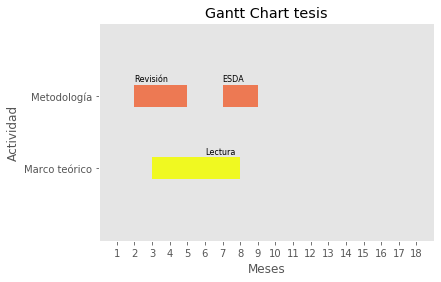

In [18]:
# Configuração da figura
fig, gnt = plt.subplots()

plt.title("Gantt Chart tesis")
gnt.grid(False)

gnt.set_ylim(-1, len(tuplas))
gnt.set_xlim(0, len(date_range)+1)

gnt.set_xlabel('Meses')
gnt.set_ylabel('Actividad')

gnt.set_xticks(x_axis)
ticks_y = list(range(len(ylabels)))
gnt.set_yticks(ticks_y)
gnt.set_yticklabels(ylabels)

desloc_y = 0.2
desloc_x_final = -2
tam_fonte = 8

for show in barsShows:
    posInicial = barsShows[show][0][0] # posicao x da primeira barra
    posFinal = barsShows[show][-1][0] + barsShows[show][-1][1] # posicao x da ultima barra + comprimento

    textoInicial = tuplas[show][2]
    textoFinal = tuplas[show][3]

    if barsShows[show]:
        for el in barsShows[show]:
            gnt.barh(show, left=el[0], width=el[1], height=0.3, color=colors[show]) 

        gnt.text(posInicial, show + desloc_y, textoInicial, fontSize=tam_fonte)
        gnt.text(posFinal + desloc_x_final, show + desloc_y, textoFinal, fontSize=tam_fonte)

plt.show()